In [106]:
import assp
import numpy as np
import importlib
importlib.reload(assp)
import matplotlib.pyplot as plt
import copy
import scipy

signal = assp.Signal1D([5, 10], [np.pi/2, np.pi/4], 100, [50, 25])
print(signal.s.shape)
window = 10
N = signal.N - window
P = np.zeros((N, 200))
for n in range(N):
    sig = copy.copy(signal)
    sig.s = sig.s[:, n:n+window]
    sig.N = sig.s.shape[1]
    ula = assp.ULA(signal.wavelength/2, 10, 5, sig)
    barlett = assp.BarlettBeamformer(2, 200, ula)
    P[n,:] = barlett.P


(2, 100)


C:\Users\kissg\AppData\Local\Temp\ipykernel_6692\2463632047.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  P[n,:] = barlett.P


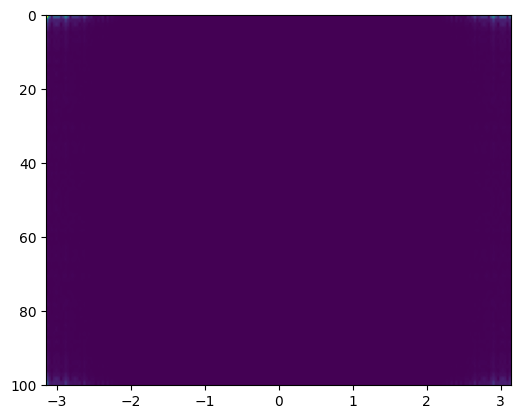

In [107]:
P = np.fft.fft2(P.T)
P = np.abs(P)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(P, extent=[-np.pi, np.pi, 100, 0])
plt.xlabel = "Latency [sample]"
plt.ylabel = "\Theta [rad]"
ax.set_aspect(0.05)
plt.show()